# Data Mining Assignment 06.2

## Sai Koushik Thatipamula U18895638

By identifying the most important features for predicting breast cancer, we can better understand the biology of the disease and develop more accurate and efficient machine learning models. This could lead to improved early detection and diagnosis of breast cancer, as well as more personalized treatment plans for patients. So, Let us try developing a model to predict whether a breast tumor is benign or malignant using only the most important features. In this notebook,I will include all the data exploration steps needed and any data cleansing methods if required.

## 6.2.1 Importing all the necessary packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

### 6.2.2 Fetching data from CSV file

In [2]:
# Reading the CSV file using pandas
data = pd.read_csv('refined_data.csv')

In [3]:
X = data[['Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion',
          'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses']]

In [4]:
y = data[['Class']]

We have created X and y dataframes with X embedded with all the potential predictors and y with the target class.

In [5]:
print("X DataFrame:")
print(X.head())

X DataFrame:
   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2         

In [6]:
print("\n\ny DataFrame:")
print(y.head(15))



y DataFrame:
    Class
0       0
1       0
2       0
3       0
4       0
5       1
6       0
7       0
8       0
9       0
10      0
11      0
12      1
13      0
14      1


In [7]:
X.shape

(683, 9)

Dataframe X has a total of 683 instances with 9 columns(features)

In [8]:
y.shape

(683, 1)

Dataframe y has a total of 683 instances with a target column differentiating in between 0(type 2 Tumor) and 1 (type 4 tumor).

In [9]:
counts = y['Class'].value_counts()
print(counts)

0    444
1    239
Name: Class, dtype: int64


All the expected instances are loaded into our dataframes.

### 6.2.3 Splitting our data sets into Train and Test sets

In [10]:
np.random.seed(610)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)

The training set contains 70% of the original data, and the testing set contains the remaining 30%. The random_state parameter ensures that the data split remains the same whenever the chunk is executed with same seed value.

### 6.2.4 Fitting Model without balancing the data

### 6.2.41 Logistic Regression

In [11]:
# Logistic Regression without any balancing technique
clf_lgr = LogisticRegression()
clf_lgr.fit(X_train, y_train)
y_pred = clf_lgr.predict(X_test)

print(f"Metrics for {clf_lgr.__class__.__name__} without balancing:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")

Metrics for LogisticRegression without balancing:
Accuracy: 0.9658536585365853
Precision: 0.958904109589041
Recall: 0.9459459459459459
F1 Score: 0.9523809523809523
Confusion Matrix:
[[128   3]
 [  4  70]]




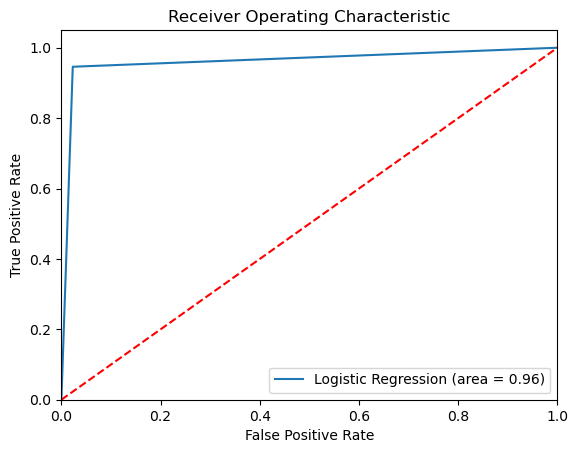

In [12]:
# Plotting an ROC Curve for Logistic reg 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [13]:
# Calculating AUC for LGR
auc = roc_auc_score(y_test, y_pred)
print("AUC Score for Logistic Regression: ", auc)

AUC Score for Logistic Regression:  0.9615225912935838


The logistic regression model, without any data balancing, demonstrates high accuracy, precision, and recall. It shows a relatively strong performance in identifying both 'benign' and 'malignant' cases, as evidenced by the high values in the confusion matrix.

### 6.2.42 SVC

In [14]:
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)

print(f"Metrics for {clf_svc.__class__.__name__} without balancing:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")

Metrics for SVC without balancing:
Accuracy: 0.975609756097561
Precision: 0.948051948051948
Recall: 0.9864864864864865
F1 Score: 0.9668874172185431
Confusion Matrix:
[[127   4]
 [  1  73]]




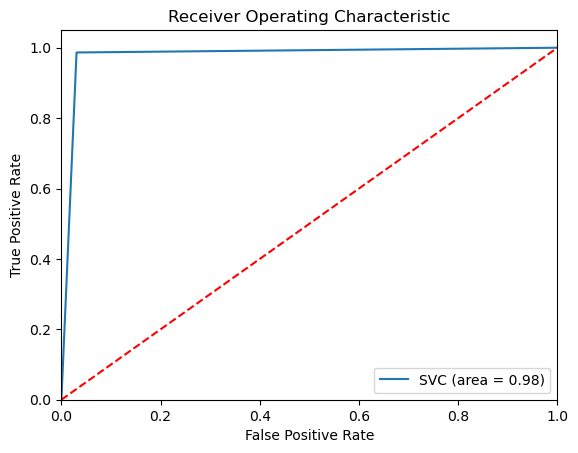

In [15]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
# Calculating AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC Score for SVC : ", auc)

AUC Score for SVC :  0.9779760676707241


The model reveals that out of 131 actual 'benign' cases, the model correctly predicted 127 as 'benign' (true negatives) and incorrectly classified 4 as 'malignant' (false positives). Out of 74 actual 'malignant' cases, the model correctly predicted 73 as 'malignant' (true positives) and incorrectly classified 1 as 'benign' (false negatives).

### 6.2.43 Decision Tree

In [17]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

y_pred = clf_dt.predict(X_test)
print(f"Metrics for {clf_dt.__class__.__name__} without balancing:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")

Metrics for DecisionTreeClassifier without balancing:
Accuracy: 0.9414634146341463
Precision: 0.9305555555555556
Recall: 0.9054054054054054
F1 Score: 0.9178082191780821
Confusion Matrix:
[[126   5]
 [  7  67]]




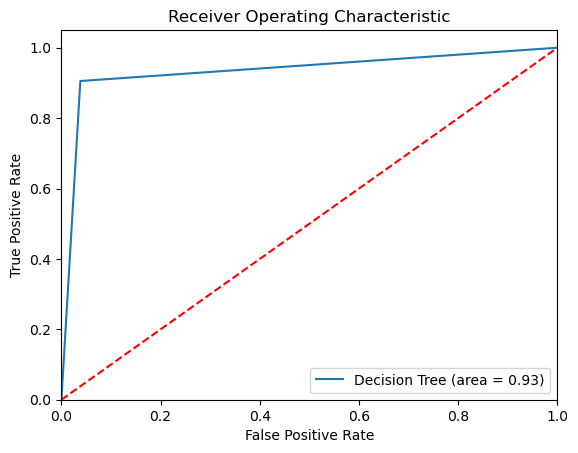

In [18]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
# Calculating AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC Score for Decision Tree: ", auc)

AUC Score for Decision Tree:  0.9336187332370538


This model demonstrates a reasonably high accuracy of approximately 94.14%. It has a strong precision score of around 93.05%, indicating a high percentage of accurate positive predictions. However, the model's recall is approximately 90.54%, suggesting it identifies a slightly lower proportion of actual positives.

### 6.2.5 Fitting Model by balancing data using SMOTE

Our dataset is having a significant class imbalance where Class 0(type 2 tumor) has high instances and Class 1(type 4 tumor) has low instances comparatively. Considering the size of our dataset, it is ideal to use a technique like SMOTE to prevent data loss.

In [20]:
smote = SMOTE(random_state=2606)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Metrics for LogisticRegression with SMOTE balancing:
Accuracy: 0.9804878048780488
Precision: 0.9605263157894737
Recall: 0.9864864864864865
F1 Score: 0.9733333333333333
Confusion Matrix:
[[128   3]
 [  1  73]]




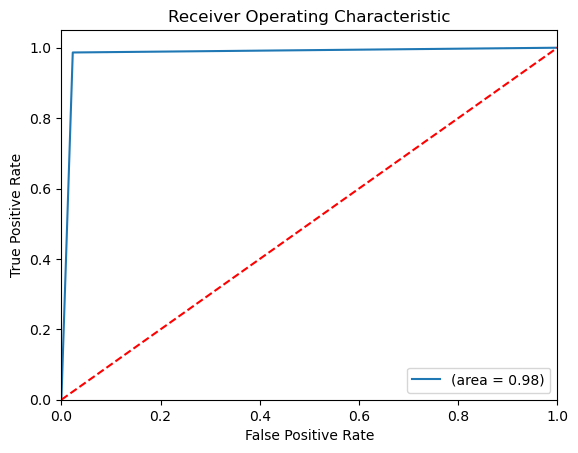

AUC Score -  0.9817928615638539
------------------------------------------------------------
Metrics for SVC with SMOTE balancing:
Accuracy: 0.975609756097561
Precision: 0.9367088607594937
Recall: 1.0
F1 Score: 0.9673202614379084
Confusion Matrix:
[[126   5]
 [  0  74]]




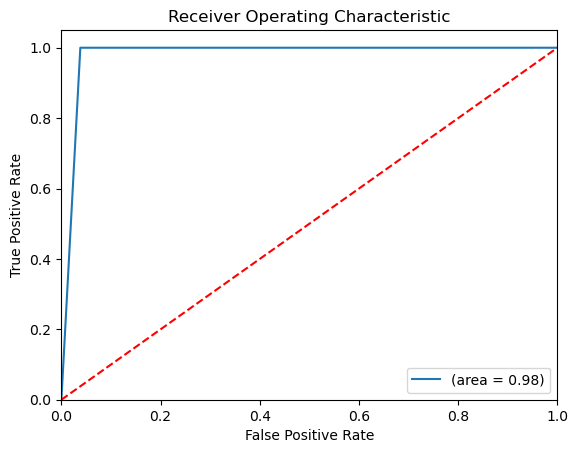

AUC Score -  0.9809160305343512
------------------------------------------------------------
Metrics for DecisionTreeClassifier with SMOTE balancing:
Accuracy: 0.9365853658536586
Precision: 0.9420289855072463
Recall: 0.8783783783783784
F1 Score: 0.9090909090909092
Confusion Matrix:
[[127   4]
 [  9  65]]




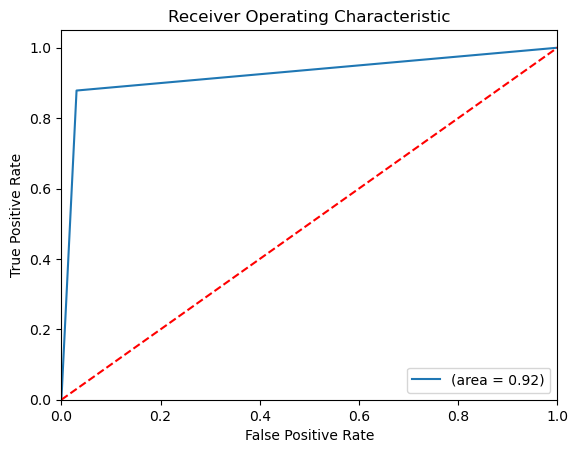

AUC Score -  0.92392201361667
------------------------------------------------------------


In [21]:
classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier()]
for clf in classifiers:
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(X_test)
    print(f"Metrics for {clf.__class__.__name__} with SMOTE balancing:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")
    
    # ROC Curve

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc_score(y_test, y_pred))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Calculating AUC
    auc = roc_auc_score(y_test, y_pred)
    print("AUC Score - ", auc)
    
    
    print("------------------------------------------------------------")
    

Overall, LogisticRegression and SVC perform well with high precision, recall, and F1 score, suggesting their effectiveness in correctly classifying tumor types, while DecisionTreeClassifier, though lower in performance, still demonstrates reasonable predictive capability.

## 6.2.6 Randomize Search to narrow the possible range of parameter values

### 6.2.61 Logistic regression

In [22]:
param_grid_logreg = {
    'C': [0.5, 1, 1.5],
    'penalty': ['l2'],
    'class_weight': [None, 'balanced']
}

In [23]:
#clf_logreg_r = RandomizedSearchCV(LogisticRegression(), param_grid_logreg, cv=5)
clf_logreg_r = RandomizedSearchCV(estimator=LogisticRegression(random_state=2606), 
        scoring='f1', 
        param_distributions=param_grid_logreg, 
        n_iter = 250_000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1)

In [24]:
# Fiting and evaluating the model using Logistic Regression with Random Search
clf_logreg_r.fit(X_resampled, y_resampled)
y_pred_logreg = clf_logreg_r.predict(X_test)
print("Metrics for Logistic Regression with tuned hyperparameters Randomized :")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("\n")

Metrics for Logistic Regression with tuned hyperparameters Randomized :
Accuracy: 0.9804878048780488
Precision: 0.9605263157894737
Recall: 0.9864864864864865
F1 Score: 0.9733333333333333
Confusion Matrix:
[[128   3]
 [  1  73]]




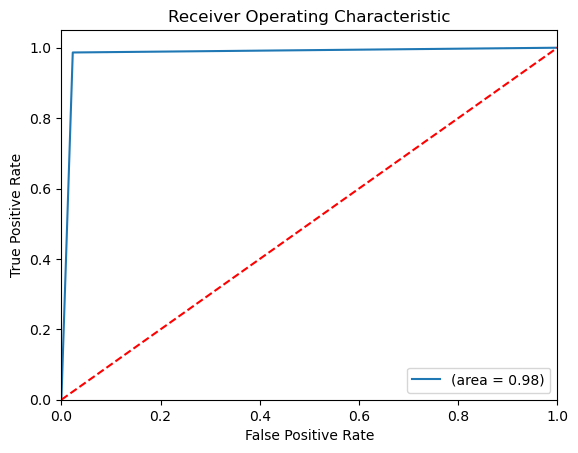

In [25]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc_score(y_test, y_pred_logreg))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
# Calculating AUC
auc = roc_auc_score(y_test, y_pred_logreg)
print("AUC Score for Log Reg with Randomized Search: ", auc)

AUC Score for Log Reg with Randomized Search:  0.9817928615638539


The AUC score for the Logistic Regression model with Randomized Search is 0.9818, indicating a high level of discrimination capability of the model in distinguishing between the classes. These results suggest that the model is highly accurate and reliable in predicting outcomes, with a strong balance between precision and recall.

### 6.2.62 SVC

In [27]:
param_grid_svc = {
    'C': [8, 9, 10, 11, 12],
    'kernel': ['rbf'],
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1],
    'class_weight': [None, 'balanced']
}

In [28]:
#clf_svc_r = RandomizedSearchCV(SVC(), param_grid_svc, cv=5)
clf_svc_r = RandomizedSearchCV(estimator=SVC(random_state=2606), 
        scoring='f1', 
        param_distributions=param_grid_svc, 
        n_iter = 250_000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1)

In [29]:
clf_svc_r.fit(X_resampled, y_resampled)
y_pred_svc = clf_svc_r.predict(X_test)
print("Metrics for Support Vector Classifier with tuned hyperparameters Randomized:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Precision:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print("F1 Score:", f1_score(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))
print("\n")

Metrics for Support Vector Classifier with tuned hyperparameters Randomized:
Accuracy: 0.9609756097560975
Precision: 0.9342105263157895
Recall: 0.9594594594594594
F1 Score: 0.9466666666666667
Confusion Matrix:
[[126   5]
 [  3  71]]




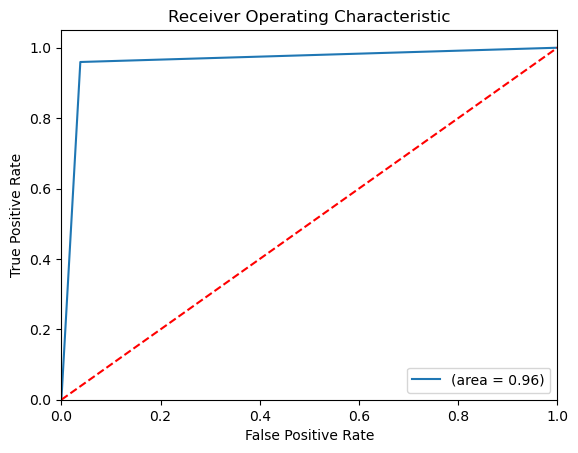

In [30]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc_score(y_test, y_pred_svc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [49]:
# Calculating AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC Score for SVC RS: ", auc)

AUC Score for SVC RS:  0.92392201361667


The Support Vector Classifier with tuned hyperparameters using Randomized search shows strong performance with an accuracy of 96.10%. It maintains a high precision of 93.42% and a recall of 95.95%, leading to a balanced F1 score of 94.67%. The AUC score of 92.39% confirms its robust discriminatory ability. However, it shows a slightly higher tendency to misclassify negative instances as positive, as seen in the confusion matrix with 5 false positives and 3 false negatives. Overall, the model demonstrates strong predictive capability with a well-balanced precision and recall, but falls behind the logistic regression.

### 6.2.63 Decision Tree

In [32]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

In [33]:
#clf_dt_r = RandomizedSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
clf_dt_r = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=2606), 
        scoring='f1', 
        param_distributions=param_grid_dt, 
        n_iter = 250_000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1)

In [34]:
clf_dt_r.fit(X_resampled, y_resampled)
y_pred_dt = clf_dt_r.predict(X_test)
print("Metrics for Decision Tree with tuned hyperparameters Randomized:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\n")

Metrics for Decision Tree with tuned hyperparameters Randomized:
Accuracy: 0.9463414634146341
Precision: 0.92
Recall: 0.9324324324324325
F1 Score: 0.9261744966442953
Confusion Matrix:
[[125   6]
 [  5  69]]




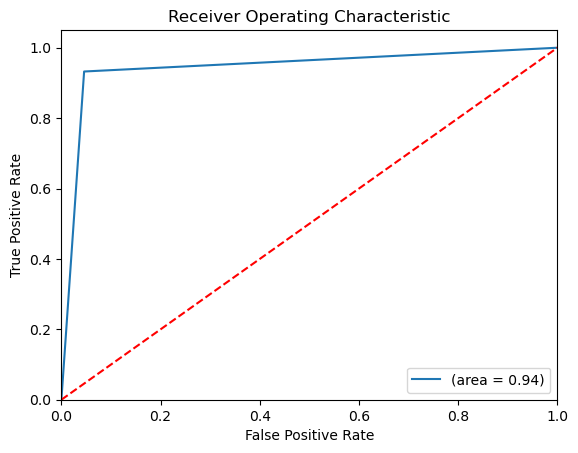

In [35]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc_score(y_test, y_pred_dt))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Calculating AUC
auc = roc_auc_score(y_test, y_pred_dt)
print("AUC Score for Decision Tree: ", auc)

AUC Score for Decision Tree:  0.9433154528574377


The Decision Tree model with tuned hyperparameters using Randomized search achieves a moderate performance, with decent Accuracy, Precision and F1 scores, but falls behind both SVC and logistic regression models very much.

### 6.2.7 Grid Search

### 6.2.71 logistic Regression

In [37]:
# Perform grid search for each model
clf_logreg_g = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5)

In [38]:
# Fit and evaluate the tuned models
clf_logreg_g.fit(X_resampled, y_resampled)
y_pred_logreg_grid = clf_logreg_g.predict(X_test)

print("Metrics for Logistic Regression with tuned hyperparameters Grid Search:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg_grid))
print("Precision:", precision_score(y_test, y_pred_logreg_grid))
print("Recall:", recall_score(y_test, y_pred_logreg_grid))
print("F1 Score:", f1_score(y_test, y_pred_logreg_grid))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_grid))
print("\n")

Metrics for Logistic Regression with tuned hyperparameters Grid Search:
Accuracy: 0.9804878048780488
Precision: 0.9605263157894737
Recall: 0.9864864864864865
F1 Score: 0.9733333333333333
Confusion Matrix:
[[128   3]
 [  1  73]]




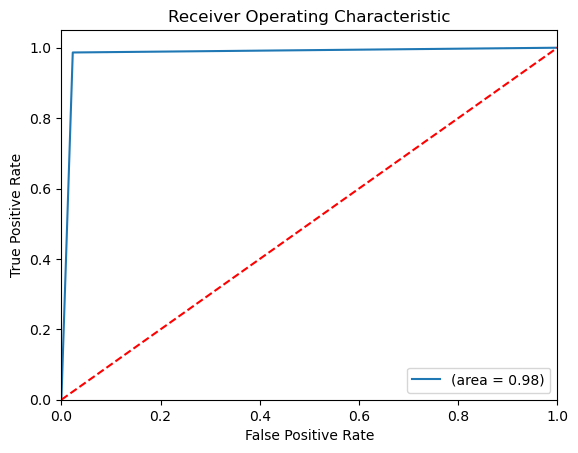

In [39]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_grid)
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc_score(y_test, y_pred_logreg_grid))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [40]:
# Calculating AUC
auc = roc_auc_score(y_test, y_pred_logreg_grid)
print("AUC Score for Logistic Reg Grid: ", auc)

AUC Score for Logistic Reg Grid:  0.9817928615638539


The Logistic Regression model with tuned hyperparameters using Grid Search demonstrates a strong performance. It achieves a high accuracy of 98.05%, indicating a large proportion of correctly classified instances. The precision of 96.05% reflects the model's ability to accurately identify true positives from the predicted positive cases, while the recall of 98.65% suggests its capability to capture almost all actual positive cases. The F1 score, at 97.33%, represents a balanced performance between precision and recall. The high AUC score of 98.18% confirms its robust discriminatory ability. The confusion matrix reveals only 3 false positives and 1 false negative, signifying its excellent ability to classify instances accurately. Overall, the model demonstrates exceptional predictive capability with high accuracy and well-balanced precision and recall, making it a robust choice for this dataset.

### 6.2.72 SVC

In [41]:
clf_svc_g = GridSearchCV(SVC(), param_grid_svc, cv=5)

In [42]:
clf_svc_g.fit(X_resampled, y_resampled)
y_pred_svc_grid = clf_svc_g.predict(X_test)
print("Metrics for Support Vector Classifier with tuned hyperparameters Grid Search:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc_grid))
print("Precision:", precision_score(y_test, y_pred_svc_grid))
print("Recall:", recall_score(y_test, y_pred_svc_grid))
print("F1 Score:", f1_score(y_test, y_pred_svc_grid))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc_grid))
print("\n")

Metrics for Support Vector Classifier with tuned hyperparameters Grid Search:
Accuracy: 0.9658536585365853
Precision: 0.935064935064935
Recall: 0.972972972972973
F1 Score: 0.9536423841059603
Confusion Matrix:
[[126   5]
 [  2  72]]




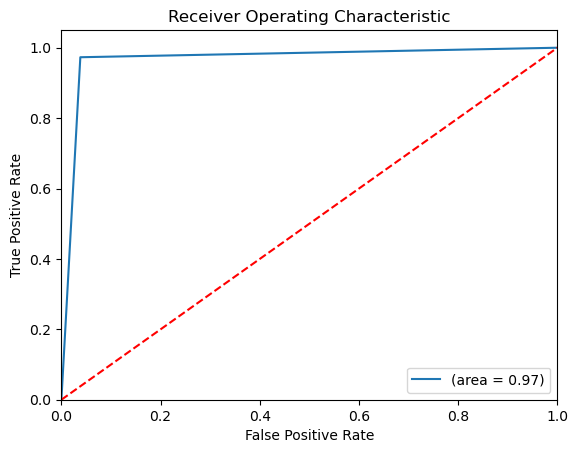

In [43]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc_grid)
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc_score(y_test, y_pred_svc_grid))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [44]:
# Calculating AUC
auc = roc_auc_score(y_test, y_pred_svc_grid)
print("AUC Score for Decision Tree: ", auc)

AUC Score for Decision Tree:  0.9674025170208377


The Support Vector Classifier with tuned parameters demonstrates strong performance with an accuracy of approximately 96.59%, precision of about 93.51%, and recall of roughly 97.30%. The corresponding F1 score is approximately 95.36%. Additionally, the Decision Tree's AUC score is 0.9674, indicating its effectiveness in distinguishing between the positive and negative classes.

### 6.2.73 Decision tree

In [45]:
clf_dt_g = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)

In [46]:
clf_dt_g.fit(X_resampled, y_resampled)
y_pred_dt_grid = clf_dt_g.predict(X_test)
print("Metrics for Decision Tree with tuned hyperparameters Grid Search:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_grid))
print("Precision:", precision_score(y_test, y_pred_dt_grid))
print("Recall:", recall_score(y_test, y_pred_dt_grid))
print("F1 Score:", f1_score(y_test, y_pred_dt_grid))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_grid))
print("\n")

Metrics for Decision Tree with tuned hyperparameters Grid Search:
Accuracy: 0.926829268292683
Precision: 0.9402985074626866
Recall: 0.8513513513513513
F1 Score: 0.8936170212765957
Confusion Matrix:
[[127   4]
 [ 11  63]]




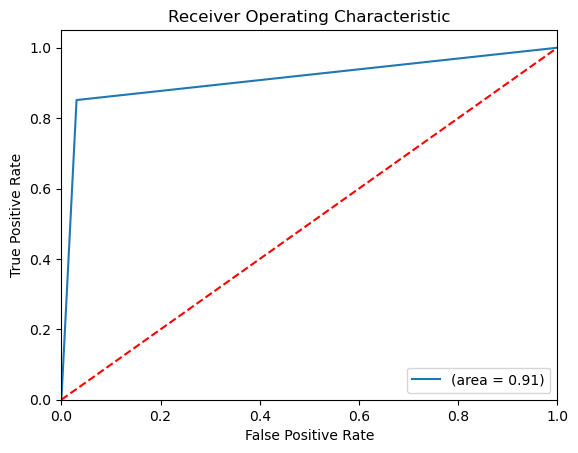

In [47]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_grid)
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc_score(y_test, y_pred_dt_grid))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() 

In [48]:
# Calculating AUC
auc = roc_auc_score(y_test, y_pred_dt_grid)
print("AUC Score for Decision Tree: ", auc)

AUC Score for Decision Tree:  0.9104085001031565


The Decision Tree model with tuned hyperparameters using Grid Search performs well with an accuracy of 92.68%. It demonstrates high precision (94.03%) and reasonable recall (85.14%), resulting in an F1 score of 89.36%. The AUC score of 91.04% further confirms its strong discriminatory ability. However, it shows a slightly higher tendency to misclassify positive instances as negative, with 11 false negatives and 4 false positives. Overall, the model showcases improved accuracy and a well-balanced precision and recall compared to the previous versions.

## Summary

For my dataset, it is important to note that, all my instances are patients who are diagnosed tumor but of different type. So there is not even a single record of any other patient with any different type of tumor other than type 2(benign) or type 4 (malignant). My main goal in this context aligns with developing a model which will predict correct kind of tumor according a patient's test. So in this case, I cannot afford any kind of False Positives and False Negatives since it might predict a wrong outcome and the treatment a patient might receive or might miss on is deadly. For this reason, I am solely focused on F1 score highly than others in my context. In Comparison, with SVM and Decision tree models ,when the model is fit using Logistic Regression, it gave me the highest f1 score of around 0.97, that implies this particular model is highly capable in capturing the true outcomes and minimising the False results. So, it minimises the risk of a patient being wrongly treated or wrongly diagnosed.

Metrics for Logistic Regression with tuned hyperparameters Randomized :
Accuracy: 0.9804878048780488
Precision: 0.9605263157894737
Recall: 0.9864864864864865
F1 Score: 0.9733333333333333
Confusion Matrix:
[[128   3]
 [  1  73]]
 
Accuracy represents the overall effectiveness of the model in correctly identifying both classes, benign and malignant, from the test set. It indicates that the model correctly predicts the class for approximately 98.05% of the samples.

Precision represents the ratio of correctly predicted positive observations to the total predicted positive observations. In the context of a medical diagnosis like cancer detection, precision reflects the model's ability to correctly identify malignant tumors among all predicted malignant cases. In this case, the model correctly identifies around 96.05% of the malignant cases among all predicted malignant cases.

Recall, also known as sensitivity, is the ratio of correctly predicted positive observations to the all observations in the actual class. In the medical context, recall represents the model's ability to correctly identify all malignant cases out of all the actual malignant cases. Here, the model correctly identifies around 98.65% of the actual malignant cases.

F1 Score is the harmonic mean of precision and recall. It provides a balance between the precision and recall. In this case, the F1 Score is approximately 0.9733, which indicates a strong balance between precision and recall.

The confusion matrix shows that the model correctly predicted 128 instances of the 'benign' class (true negatives) and 73 instances of the 'malignant' class (true positives). It misclassified 3 instances of the 'benign' class as 'malignant' (false positives) and 1 instance of the 'malignant' class as 'benign' (false negative). The high AUC score indicates that the model has a strong ability to distinguish between positive and negative classes as well which is crucial in this context. 

Since all my variable's range is in between 1-10, and all the records in instances are integers, logistic regression being the best model makes perfect sense.

To sum it up, The high F1 score coming from this model acquainted with precision and recall values suggest that the model is effective in minimizing both false positives and false negatives, which is crucial in the context of medical diagnoses where misclassification can have serious consequences.